In [35]:
import numpy as np
import pandas as pd
import os
from sklearn import tree
import graphviz

import matplotlib.pyplot as plt
import seaborn as sns

pd.options.display.max_rows = 100
pd.options.display.max_columns = 100

In [84]:
from scipy import stats
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import sklearn.metrics
from sklearn import metrics 

In [96]:
basedir = os.getcwd()
datadir = basedir + '/data'

data = pd.read_csv(datadir + '/X_processed.csv', low_memory = False, index_col = 0)
y_predict = pd.read_csv(datadir + '/y_processed.csv', low_memory = False, index_col = 0)
y_predict2 = pd.read_csv(datadir + '/y2_processed.csv', low_memory = False, index_col = 0)

features = pd.read_csv(datadir + '/features_processed.csv',index_col = 0)
OTU = pd.read_csv(datadir + '/OTU_processed.csv',index_col = 0)
labels = pd.read_csv(datadir + '/labels_processed.csv',index_col = 0)
OTUref = pd.read_csv(datadir + '/otu_annotation.csv', index_col = 0)

In [97]:
OTU

,OTU_25,OTU_38,OTU_233,OTU_962,OTU_168,OTU_1330,OTU_3,OTU_153,OTU_4,OTU_1123,OTU_135,OTU_360,OTU_42,OTU_537,OTU_125,OTU_1614,OTU_73,OTU_1,OTU_335,OTU_1359,OTU_2,OTU_237,OTU_50,OTU_40,OTU_1408,OTU_21,OTU_24,OTU_381,OTU_191,OTU_443,OTU_839,OTU_1142,OTU_1430,OTU_7,OTU_150,OTU_81,OTU_94,OTU_137,OTU_8,OTU_6,OTU_15,OTU_598,OTU_123,OTU_1332,OTU_32,OTU_626,OTU_1333,OTU_30,OTU_665,OTU_339,...,OTU_1882,OTU_1597,OTU_915,OTU_1172,OTU_1683,OTU_953,OTU_1551,OTU_1677,OTU_1856,OTU_732,OTU_1884,OTU_1413,OTU_797,OTU_1855,OTU_1297,OTU_1639,OTU_1246,OTU_1433,OTU_1568,OTU_1801,OTU_1894,OTU_1385,OTU_1846,OTU_1470,OTU_1835,OTU_491,OTU_325,OTU_644,OTU_860,OTU_1431,OTU_738,OTU_1395,OTU_1826,OTU_1892,OTU_1812,OTU_1625,OTU_1633,OTU_1343,OTU_1827,OTU_1704,OTU_1630,OTU_1678,OTU_1685,OTU_1628,OTU_1764,OTU_1854,OTU_1803,OTU_1593,OTU_1382,BodySite
1,0,0,0,0,0,0,0,0,7,0,0,0,0,0,0,0,0,0,0,0,1112,0,0,0,0,0,0,0,0,1,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Vaginal_Swab
6,0,0,0,0,0,0,2225,0,28,0,0,0,0,0,0,0,0,0,0,0,15,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Vaginal_Swab
7,0,0,0,0,0,0,1079,0,21,0,0,0,0,1,0,0,0,0,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Vaginal_Swab
8,0,0,0,0,0,0,2179,0,86,0,0,0,0,1,0,0,0,0,0,0,14,0,0,0,0,0,0,0,0,1,2,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Vaginal_Swab
9,2,15,0,0,0,0,2,0,1,0,0,0,0,3,0,0,0,0,0,0,1310,0,0,7,0,0,0,0,0,22,0,0,6,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Vaginal_Swab
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4396,0,0,0,0,0,2,0,0,0,0,0,0,22,0,0,0,0,662,0,4,0,2,10,0,0,0,24,0,0,0,0,0,0,2,0,0,0,0,6,24,14,0,0,0,0,0,0,4,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Tooth_Gum
4397,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,576,0,0,0,2,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,421,69,137,0,0,102,0,0,0,164,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Tooth_Gum
4398,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,0,0,0,0,0,0,0,0,0,0,0,82,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Stool
4399,0,0,0,0,0,0,0,34,0,0,0,0,0,0,0,0,0,1,10,0,0,0,0,463,0,0,0,0,0,0,0,0,0,8,0,36,19,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Stool


In [28]:
labels

,Unnamed: 0,SubjectID,#SampleID,BodySite,Preterm
0,1,10005,1000501278,Vaginal_Swab,0
1,6,10003,1000301298,Vaginal_Swab,0
2,7,10003,1000301308,Vaginal_Swab,0
3,8,10003,1000301318,Vaginal_Swab,0
4,9,10004,1000401368,Vaginal_Swab,0
...,...,...,...,...,...
3876,4396,10046,1004604448.rs,Tooth_Gum,0
3877,4397,10101,1010104488.rs,Tooth_Gum,1
3878,4398,10024,1002402218.ca2.rs,Stool,0
3879,4399,10023,1002302248.bn1.rs,Stool,0


In [129]:
OTU = OTU.drop(['BodySite'],axis=1)

Accuracy:  80.18018018018019
f1:  44.20289855072463
precision:  87.14285714285714
recall:  29.61165048543689


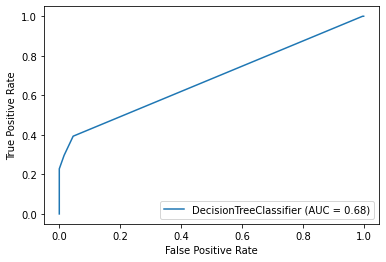

In [130]:
X = OTU
y = labels['Preterm']

# splitting data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

# sklearn has these classifiers built in
# We're going to import the decision tree classifier
from sklearn.tree import DecisionTreeClassifier

# This is where we set our machine learning algorithm type - Decision Tree
dectree = DecisionTreeClassifier(random_state=0,max_depth = 4) 
dectree.fit(X_train,y_train.values.ravel())

# Use the model to make predictions using our testing input data
y_pred_dectree = dectree.predict(X_test)

# Calculate the accuracy of the model as a percent
accuracy = metrics.accuracy_score(y_test, y_pred_dectree)
accuracy_percentage = 100 * accuracy
print('Accuracy: ',accuracy_percentage)

# Calculate the f1 of the model as a percent
f1 = metrics.f1_score(y_test, y_pred_dectree)
f1_percentage = 100 * f1
print('f1: ',f1_percentage)

# Calculate the precision of the model as a percent
precision = metrics.precision_score(y_test, y_pred_dectree)
precision_percentage = 100 * precision
print('precision: ',precision_percentage)

# Calculate the recall of the model as a percent
recall = metrics.recall_score(y_test, y_pred_dectree)
recall_percentage = 100 * recall
print('recall: ',recall_percentage)

metrics.plot_roc_curve(dectree, X_test, y_test)

In [131]:
dot_data = tree.export_graphviz(dectree,out_file=None,feature_names=OTU.columns,class_names=['Not Preterm','Preterm'])
graph = graphviz.Source(dot_data)
graph.render("image",view=True)
f = open(basedir + "/figures/OTUtree.txt","w+")
f.write(dot_data)
f.close()

In [95]:
OTUref.loc[['OTU_206','OTU_1029','OTU_3','OTU_21','OTU_152']]

,Kingdom,Phylum,Class,Order,Family,Genus,Species
OTUId,,,,,,,
OTU_206,Bacteria,Fusobacteria,Fusobacteriia,Fusobacteriales,Leptotrichiaceae,NaN,NaN
OTU_1029,Bacteria,Bacteroidetes,Bacteroidia,Bacteroidales,Bacteroidaceae,Bacteroides,NaN
OTU_3,Bacteria,Firmicutes,Bacilli,Lactobacillales,Lactobacillaceae,Lactobacillus,NaN
OTU_21,Bacteria,Actinobacteria,Coriobacteriia,Coriobacteriales,Coriobacteriaceae,NaN,NaN
OTU_152,Bacteria,Firmicutes,Clostridia,Clostridiales,NaN,NaN,NaN


In [111]:
body_label = labels.groupby('BodySite')

vaginal_label = body_label.get_group("Vaginal_Swab")
skin_label = body_label.get_group("Back_of_ear_L")
skin_label += body_label.get_group("Back_of_ear_R")
Cord_Blood_label = body_label.get_group("Cord Blood (Serum)")
skin_label += body_label.get_group("Elbow_crease_R")
Saliva_label = body_label.get_group("Saliva")
Stool_label = body_label.get_group("Stool")
Tooth_Gum_label = body_label.get_group("Tooth_Gum")
Urine_label = body_label.get_group("Urine")

In [108]:
body_group = OTU.groupby('BodySite')
body_group['BodySite'].value_counts()

vaginal_swab = body_group.get_group("Vaginal_Swab")
skin = body_group.get_group("Back_of_ear_L")
skin += body_group.get_group("Back_of_ear_R")
Cord_Blood = body_group.get_group("Cord Blood (Serum)")
skin += body_group.get_group("Elbow_crease_R")
Saliva = body_group.get_group("Saliva")
Stool = body_group.get_group("Stool")
Tooth_Gum = body_group.get_group("Tooth_Gum")
Urine = body_group.get_group("Urine")

In [125]:
vaginal_swab = vaginal_swab.drop(['BodySite'],axis=1)

KeyError: "['BodySite'] not found in axis"

Accuracy:  85.57213930348259
f1:  60.273972602739725
precision:  91.66666666666666
recall:  44.89795918367347


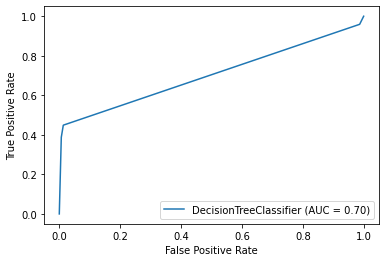

In [121]:
# splitting data
X = vaginal_swab
y = vaginal_label['Preterm']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

# sklearn has these classifiers built in
# We're going to import the decision tree classifier
from sklearn.tree import DecisionTreeClassifier

# This is where we set our machine learning algorithm type - Decision Tree
dectree = DecisionTreeClassifier(random_state=0,max_depth = 5) 
dectree.fit(X_train,y_train.values.ravel())

# Use the model to make predictions using our testing input data
y_pred_dectree = dectree.predict(X_test)

# Calculate the accuracy of the model as a percent
accuracy = metrics.accuracy_score(y_test, y_pred_dectree)
accuracy_percentage = 100 * accuracy
print('Accuracy: ',accuracy_percentage)

# Calculate the f1 of the model as a percent
f1 = metrics.f1_score(y_test, y_pred_dectree)
f1_percentage = 100 * f1
print('f1: ',f1_percentage)

# Calculate the precision of the model as a percent
precision = metrics.precision_score(y_test, y_pred_dectree)
precision_percentage = 100 * precision
print('precision: ',precision_percentage)

# Calculate the recall of the model as a percent
recall = metrics.recall_score(y_test, y_pred_dectree)
recall_percentage = 100 * recall
print('recall: ',recall_percentage)

metrics.plot_roc_curve(dectree, X_test, y_test)

In [122]:
dot_data = tree.export_graphviz(dectree,out_file=None,feature_names=vaginal_swab.columns,class_names=['Not Preterm','Preterm'])
graph = graphviz.Source(dot_data)
graph.render("image",view=True)
f = open(basedir + "/figures/vaginaltree.txt","w+")
f.write(dot_data)
f.close()